In [1]:
!pwd

/Users/macbook/divtel


In [52]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
%matplotlib inline
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
import sys
from ipywidgets import interactive, FloatSlider, interact, fixed
from divtel import *


import copy
import astropy.units as u
from astropy.coordinates import SkyCoord
from astroplan.plots import plot_sky
from astroplan import FixedTarget
#from . import utils
#from .const import COLORS
#from . import pointing

from matplotlib.transforms import Affine2D
from astropy.visualization.wcsaxes import SphericalCircle

import healpy as hp
import tqdm

#!jupyter labextension install @jupyter-widgets/jupyterlab-manager

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## LOAD CTA CONFIG

In [3]:
cta = CTA_Info('south')

Observer         :  CTA South
Location         :  Paranal , (1946.635798, -5467.63394562, -2642.49852123) km
Observation time :  2025-01-09T21:14:04.810


In [4]:
# Note that if the radius is in meters, 
# you can set LoadConfig(file, radius="meters")
# defalut is in degrees

array = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)


## Check configuration table

In [5]:
array.table.units = "deg"
array.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [6]:
table=array.table

## Check the telescope spatial distribution
This is useful to pick the groups

In [7]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


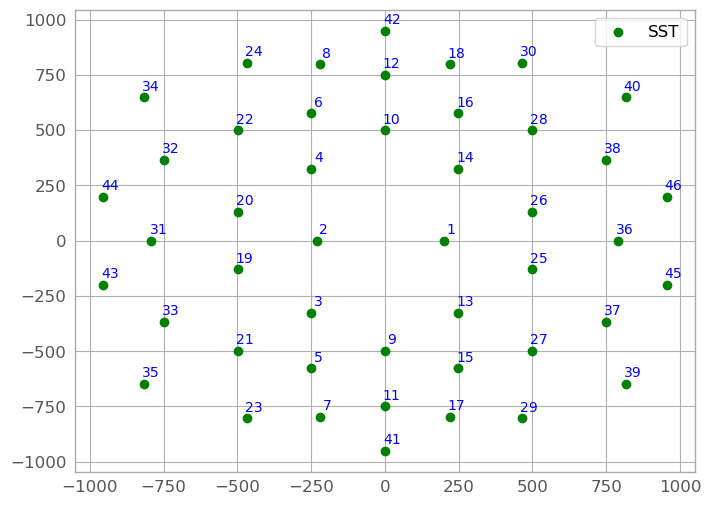

In [8]:
# Loop through all the telescopes
#for fov in array.table["fov"]:
#    print(fov)
colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
for i in range(len(array.table)):
    plt.scatter(array.table['x'][i], array.table['y'][i], c=colors[i], label=fov_labels[colors[i]])

    # Annotate each point with the telescope ID
    #matplotlib.pyplot.annotate(text, xy, xytext=None, xycoords='data', textcoords=None, arrowprops=None, annotation_clip=None, **kwargs)
#Annotate the point xy with text text.
#In the simplest form, the text is placed at xy.
    plt.annotate(str(array.table["id"][i]),
                 (array.table['x'][i], array.table['y'][i]),  # Point position
                 textcoords="offset points",  # Text position relative to the point
                 xytext=(5, 5),  # Offset in pixels (to avoid overlapping the point)
                 ha='center', fontsize=10, color='blue')
handles, labels = plt.gca().get_legend_handles_labels()
#handles, labels like this is doing
    #plt.gca() gets the current Axes object, which is where your plot is
    #.get_legend_handles_labels()
        #handles: Returns a list of the graphical elements (e.g., lines, scatter plot points) that would appear in the legend.
        # labels: Returns the text labels associated with each graphical element in handles

by_label = dict(zip(labels, handles))  # Remove duplicate labels, the dictionary by the structure takes out the double 
plt.legend(by_label.values(), by_label.keys())
#by_label.values This is pulling out the unique graphical elements
# by_label.keys  This is retrieving the unique text 
plt.savefig("./different_telescopes.png", dpi=300, bbox_inches="tight")
plt.show() 

## Check the hyper field of view (hFoV)

This is the whole telescope array hFoV maybe? (ask)

In [9]:
array.hFoV(m_cut=3) 

46it [00:06,  7.22it/s]


(62.238869377690584, 46.0)

In [10]:
#array.hFoV(m_cut=3)

## Grouping telescopes

In [11]:

sub_groups = {'1':[44,33,20], 
             '2':[43,3,21],
              '3':[35,23,15],
              '4':[10,34,24],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[5,27,17],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[32,42,28],
              '14':[1,38,45],
              '15':[25,29,46]
             }
sub_groups_2 = {'1':[44,35,5], 
             '2':[43,32,24],
              '3':[34,42,3],
              '4':[10,20,28],
              '5':[19,22,14,13],
              '6':[31,6,2],
              '7':[7,12,39],
              '8':[41,4,18],
              '9':[8,16,26],
              '10':[33,15,23],
              '11':[9,30,40],
              '12':[11,36,37],
              '13':[17,21,27],
              '14':[1,38,45],
              '15':[25,29,46]
             }
sub_groups_3={}
sub_groups_4={}
sub_groups_5={}
sub_groups_6={}
##sub_groups_3={'1':[18,14,13,17],
#             '2':[7,11,15],
#             '3':[5,8,9,12],
#             '4':[16,6,10]}


In [12]:
def compute_center_of_gravity(group):
    x, y, z = group['x'], group['y'], group['z']
    cog_x = round(np.mean(x),2)
    cog_y = round(np.mean(y),2)
    cog_z = round(np.mean(z),2)
    return cog_x, cog_y, cog_z

# Function to create new telescope list with center of gravity
def create_new_group_list(tel_group):
    new_telescopes = []
    for group in tel_group.groups:
        print(tel_group.groups)
        print (group['focal'][0],round(group['radius'][0],2))
        #id_ = group["id"][0]
        cog = compute_center_of_gravity(group)
        focal, fov = group['focal'][0], round(group['radius'][0],2)  # Assuming same within a group
        new_telescopes.append([*cog, focal, fov])
    return new_telescopes


In [13]:
tel_group_2, labels_2, number_of_telescopes_subarray_2 =array.group_by(sub_groups_2)
#tel_group_3, labels_3 = group_by(array, group=only_MST)

In [14]:
tel_group, labels, number_of_telescopes_subarray_1 =array.group_by(sub_groups)

In [15]:
# Step 2: Create new telescope list with center of gravity
new_telescopes = create_new_group_list(tel_group)
new_telescopes_2 = create_new_group_list(tel_group_2)
#new_telescopes_3 = create_new_group_list(tel_group_3)
#Why are you creating an extra telescope?


<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3  6  9 12 16 19 22 25 28 31 34 37 40 43 46]>
5.6 4.45
<TableGroups indices=[ 0  3 

In [16]:
# Define the file path where you want to save the output
output_file_path = './SST_file_1.txt'

# Open the file in write mode
with open(output_file_path, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path}")


New telescope data has been written to ./SST_file_1.txt


In [17]:
print(list(enumerate(new_telescopes_2)))

[(0, [-673.67, -342.0, 50.42, 5.6, 4.45]), (1, [-723.0, 324.0, 24.58, 5.6, 4.45]), (2, [-355.33, 424.33, 26.42, 5.6, 4.45]), (3, [0.0, 376.0, 16.58, 5.6, 4.45]), (4, [-125.0, 92.25, 21.38, 5.6, 4.45]), (5, [-423.33, 192.33, 20.42, 5.6, 4.45]), (6, [198.67, -232.0, 40.75, 5.6, 4.45]), (7, [-9.67, 57.33, 39.25, 5.6, 4.45]), (8, [176.0, 501.33, 12.42, 5.6, 4.45]), (9, [-321.67, -582.67, 57.25, 5.6, 4.45]), (10, [427.33, 317.67, 31.92, 5.6, 4.45]), (11, [512.67, -372.0, 23.58, 5.6, 4.45]), (12, [73.33, -598.33, 48.58, 5.6, 4.45]), (13, [634.0, 56.0, 10.08, 5.6, 4.45]), (14, [640.0, -245.0, 23.92, 5.6, 4.45])]


In [18]:
# Define the file path where you want to save the output
output_file_path_2 = './SST_2.txt'

# Open the file in write mode
with open(output_file_path_2, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
    for i, telescope in enumerate(new_telescopes_2):
        # Assuming telescope is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        # Write the data to the file
        #print(values)
        file.write(f"{values}\n")

print(f"New telescope data has been written to {output_file_path_2}")


New telescope data has been written to ./SST_2.txt


## GRAPHING MULTIPLICITY AND FOV to understand what is going on 

In [19]:
array_SST= LoadConfig('./SST_file_1.txt', frame=cta, pointing2src=True)
full_array_SST = LoadConfig("/Users/macbook/divtel/Paranal_only_SST.txt", frame=cta)
array_SST_2= LoadConfig('./SST_2.txt', frame=cta, pointing2src=True)

#array_3= LoadConfig("./subarray_3_SOUTH.txt", frame=cta, pointing2src=True)

In [21]:
array_SST.table[:5]

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,736.12
2,-567.67,-341.0,46.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,663.11
3,-344.67,-676.33,63.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,758.95
4,-427.67,650.33,12.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,781.36
5,-125.0,92.25,21.38,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,158.43


In [22]:
array_SST.divergent_pointing(0.01, az=0,alt=70)

15it [00:02,  6.00it/s]
15it [00:02,  6.08it/s]


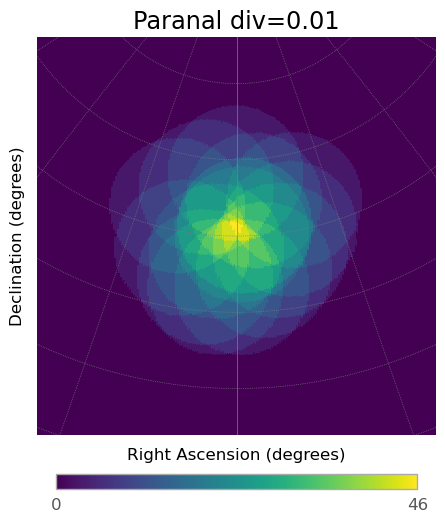

15it [00:02,  6.10it/s]
15it [00:02,  6.01it/s]


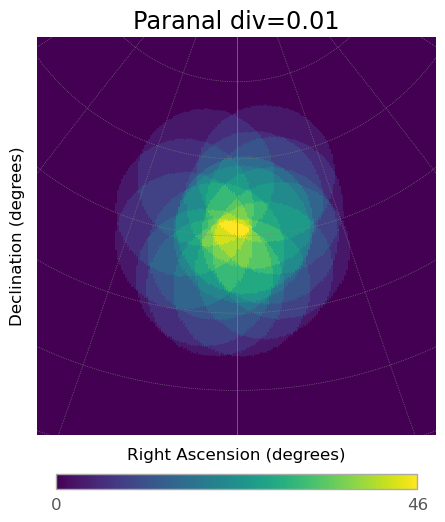

46it [00:07,  6.05it/s]
46it [00:07,  5.98it/s]


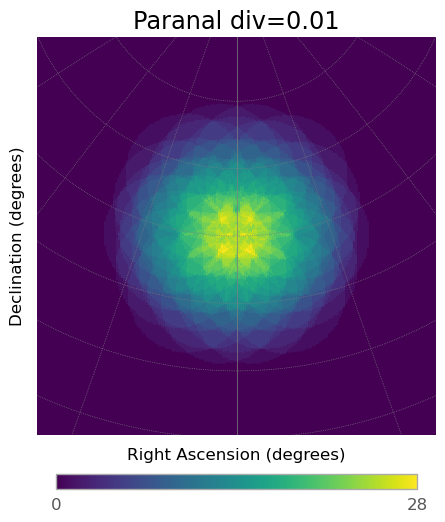

In [22]:
array_SST.divergent_pointing(0.01, az=0,alt=70)
array_SST_2.divergent_pointing(0.01, az=0,alt=70)
full_array_SST.divergent_pointing(0.01, az=0,alt=70)
array_SST.multiplicity_plot(number_of_telescopes_subarray_1)
array_SST_2.multiplicity_plot(number_of_telescopes_subarray_2)

full_array_SST.multiplicity_plot()

In [23]:
div=[]

div=np.linspace(0,0.02, 8)


In [24]:
FoV_full_array=[]
multiplicity_full_array=[]
for divergence in div:
    full_array_SST.divergent_pointing(divergence, az=0,alt=70)
    FoV=full_array_SST.hFoV(m_cut=3)[0]
    multiplicity=full_array_SST.hFoV(m_cut=3)[1]
    FoV_full_array.append(FoV)
    multiplicity_full_array.append(multiplicity)
  

46it [00:07,  6.02it/s]
46it [00:07,  5.94it/s]
46it [00:07,  5.94it/s]
46it [00:10,  4.26it/s]
46it [00:07,  5.88it/s]
46it [00:07,  5.98it/s]
46it [00:07,  5.93it/s]
46it [00:07,  5.96it/s]
46it [00:07,  5.97it/s]
46it [00:07,  5.89it/s]
46it [00:07,  5.97it/s]
46it [00:07,  5.93it/s]
46it [00:07,  6.01it/s]
46it [00:07,  6.01it/s]
46it [00:07,  5.91it/s]
46it [00:07,  5.97it/s]


In [25]:
array.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,199.0,0.0,16.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,200.19
2,-230.0,0.0,22.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,229.36
3,-249.0,-325.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.12
4,-249.0,325.0,17.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,409.16
5,-249.0,-577.0,54.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.62
6,-249.0,577.0,8.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,628.51
7,-220.0,-797.0,68.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,827.51
8,-220.0,797.0,10.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,826.84


In [26]:
FoV_array=[]
multiplicity_array=[]

for divergence in div:
    array_SST.divergent_pointing(divergence, az=0,alt=70)
    FoV=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[0]
    multiplicity=array_SST.hFoV(subarray_mult=number_of_telescopes_subarray_1)[1]
    FoV_array.append(FoV)
    multiplicity_array.append(multiplicity)
   

15it [00:02,  6.02it/s]
15it [00:02,  5.90it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.88it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.79it/s]
15it [00:02,  6.04it/s]
15it [00:02,  6.01it/s]
15it [00:02,  5.46it/s]
15it [00:02,  6.05it/s]
15it [00:02,  5.91it/s]
15it [00:02,  6.01it/s]
15it [00:02,  5.83it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.97it/s]
15it [00:02,  6.04it/s]


In [27]:
FoV_array_2=[]
multiplicity_array_2=[]
for divergence in div:
    array_SST_2.divergent_pointing(divergence, az=0,alt=70)
    FoV=array_SST_2.hFoV(subarray_mult=number_of_telescopes_subarray_2)[0]
    multiplicity=array_SST_2.hFoV(subarray_mult=number_of_telescopes_subarray_2)[1]
    FoV_array_2.append(FoV)
    multiplicity_array_2.append(multiplicity)
     

15it [00:02,  6.03it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.90it/s]
15it [00:02,  6.06it/s]
15it [00:02,  5.88it/s]
15it [00:02,  5.82it/s]
15it [00:02,  5.98it/s]
15it [00:02,  6.05it/s]
15it [00:02,  5.97it/s]
15it [00:02,  5.96it/s]
15it [00:02,  5.89it/s]
15it [00:02,  5.97it/s]
15it [00:02,  6.05it/s]
15it [00:02,  6.03it/s]
15it [00:02,  5.99it/s]
15it [00:02,  6.08it/s]


In [28]:
print(len(div), len(FoV_full_array), len(FoV_array))

8 8 8


In [29]:
## First to start understanding what is going on I wanted to graph in the 4 plots together 

In [30]:
FoV_array

[62.21264145127774,
 95.14180306260961,
 134.41812286585093,
 179.6088400751897,
 230.63527091138735,
 287.31381988955394,
 349.1068145182261,
 415.4765823059404]

## PENSAR COMO AUTOMIZAR LO SIGUIENTE EL FOV CHE STUDIO TIENE QUE SER SI O SI DEL FULL ARRAY CON EL MINIMO DEL ARRAY DE TELESCOPIOS QUE TENGO PRARA PODER CONFRONTAR MEJOR. En cambio no poner ningun limite para los subarrays

In [31]:
number_of_telescopes_subarray_1

[3, 3, 3, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]

# hFoV and multiplicities graphs 

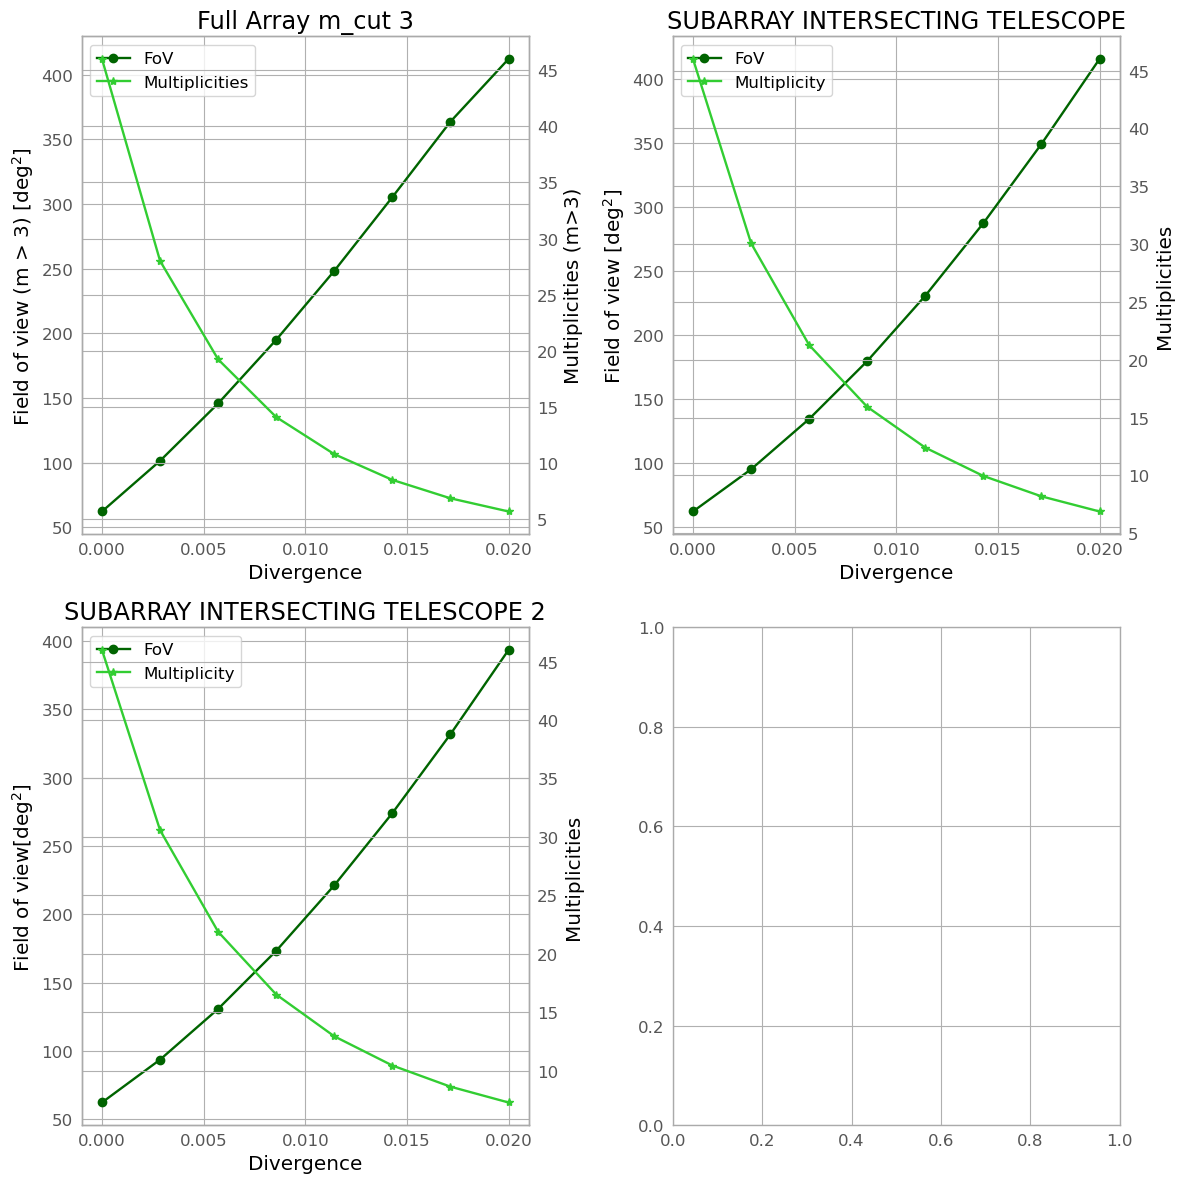

In [32]:
fig, axes = plt.subplots(2, 2, figsize=(12, 12)) 
# Plot Full Array
# Full Array with m_cut = 3
l1=axes[0,0].plot(div, FoV_full_array, label='FoV', marker='o', color='darkgreen')
ax2 = axes[0,0].twinx()
l2=ax2.plot(div, multiplicity_full_array, label='Multiplicities',marker='*', color='limegreen')
axes[0,0].set_title('Full Array m_cut 3')
axes[0,0].set_xlabel('Divergence')
axes[0,0].set_ylabel('Field of view (m > 3) [deg$^2$]')
ax2.set_ylabel('Multiplicities (m>3)')
axeslegend = l1+l2
axes[0,0].legend(axeslegend, [l.get_label() for l in axeslegend])



#Plot the ones for subarray 1
l1=axes[0,1].plot(div, FoV_array, label='FoV',marker='o', color='darkgreen')
ax5=axes[0,1].twinx()
l2=ax5.plot(div, multiplicity_array, label='Multiplicity', marker='*', color='limegreen')
axes[0,1].set_title('SUBARRAY INTERSECTING TELESCOPE')
axes[0,1].set_xlabel('Divergence')
axes[0,1].set_ylabel('Field of view [deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[0,1].legend(axeslegend, [l.get_label() for l in axeslegend])

#Plot the ones for subarray 2
l1=axes[1,0].plot(div, FoV_array_2, label='FoV',marker='o', color='darkgreen')
ax5=axes[1,0].twinx()
l2=ax5.plot(div, multiplicity_array_2, label='Multiplicity', marker='*', color='limegreen')
axes[1,0].set_title('SUBARRAY INTERSECTING TELESCOPE 2')
axes[1,0].set_xlabel('Divergence')
axes[1,0].set_ylabel('Field of view[deg$^2$]')
ax5.set_ylabel('Multiplicities')
axeslegend = l1+l2
axes[1,0].legend(axeslegend, [l.get_label() for l in axeslegend])


# Adjust layout
plt.tight_layout()



plt.show()

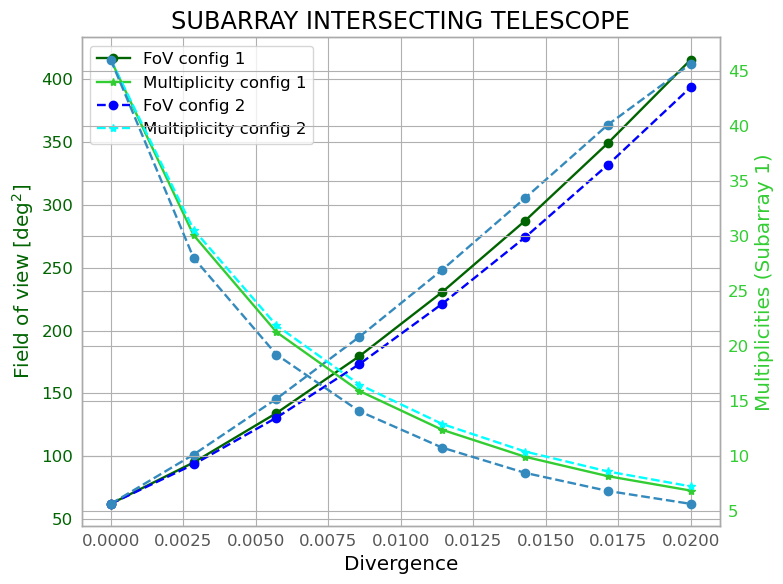

In [33]:
# Plot for subarray 1 on the primary y-axis
fig, ax1 = plt.subplots()
l1, = ax1.plot(div, FoV_array, label='FoV config 1', marker='o', color='darkgreen')
ax1.set_ylabel('Field of view [deg$^2$]', color='darkgreen')
ax1.tick_params(axis='y', labelcolor='darkgreen')

# Add secondary y-axis for multiplicity (subarray 1)
ax2 = ax1.twinx()
l2, = ax2.plot(div, multiplicity_array, label='Multiplicity config 1', marker='*', color='limegreen')

ax2.set_ylabel('Multiplicities (Subarray 1)', color='limegreen')
ax2.tick_params(axis='y', labelcolor='limegreen')

# Plot for subarray 2 on the same axes
l3, = ax1.plot(div, FoV_array_2, label='FoV config 2', marker='o', linestyle='--', color='blue')
l4, = ax2.plot(div, multiplicity_array_2, label='Multiplicity config 2', marker='*', linestyle='--', color='cyan')
#Plot the complete FoV

l5, = ax1.plot(div, FoV_full_array, label='FoV no subarrays', marker='o', linestyle='--')
l6, = ax2.plot(div, multiplicity_full_array, label='multiplicity no subarrays', marker='o', linestyle='--')
# Title and labels
ax1.set_title('SUBARRAY INTERSECTING TELESCOPE')
ax1.set_xlabel('Divergence')

# Combine legends from both y-axes
lines = [l1, l2, l3, l4]
labels = [line.get_label() for line in lines]
ax1.legend(lines, labels, loc='upper left')

# Adjust layout for better readability
fig.tight_layout()

# Show plot
plt.show()

In [34]:
 FoV_full_array

[62.21264145127774,
 101.41027747528051,
 145.7617010394081,
 195.00463287953204,
 248.29977935044113,
 305.3455192983876,
 363.70265556697655,
 412.17186357792144]

In [35]:
multiplicity_full_array = np.array(multiplicity_full_array)

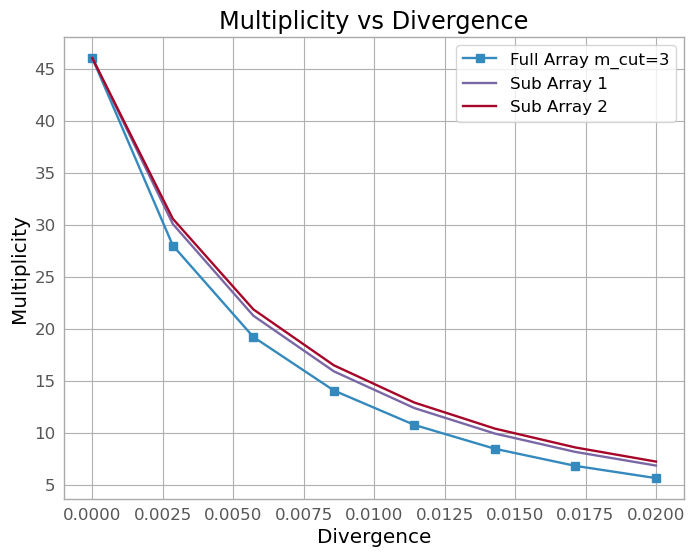

In [36]:
plt.plot(div, multiplicity_full_array, label='Full Array m_cut=3', marker='s')

plt.plot(div,  multiplicity_array, label='Sub Array 1')
plt.plot(div,  multiplicity_array_2, label='Sub Array 2')
#plt.plot(div[:10],  multiplicity_full_array_mult_cut_2[:10], label='Full Array m_cut=2', marker='s')
plt.xlabel("Divergence")  
plt.ylabel("Multiplicity")  # Y-axis label
plt.title("Multiplicity vs Divergence")  # Title of the plot
plt.legend()
plt.show()

## SHOWING WHAT HAPPENS RIGHT AFTER 0.03

In [20]:
print(type(array_SST))

<class 'divtel.array.Array'>


In [21]:
array_SST.table.units='deg'
array_SST.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,736.12
2,-567.67,-341.0,46.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,663.11
3,-344.67,-676.33,63.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,758.95
4,-427.67,650.33,12.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,781.36
5,-125.0,92.25,21.38,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,158.43
6,-423.33,192.33,20.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,467.76
7,198.67,-232.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,302.76
8,-9.67,57.33,39.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,61.25


In [22]:

table_SST_new = []
table_SST= array_SST.table
# Append the desired columns from the table to table_SST_new
table_SST_new.append(table_SST['x'])
table_SST_new.append(table_SST['y'])
table_SST_new.append(table_SST['z'])
#table_SST_new.append(table_SST['az'])
#table_SST_new.append(table_SST['alt'])
#table_SST_new.append(table_SST['zn'])
table_SST_new.append(table_SST['focal'])
table_SST_new.append(table_SST['radius'])
table_SST_new.append(table_SST['fov'])
#table_SST_new.append(table_SST['p_x'])
#table_SST_new.append(table_SST['p_y'])
#table_SST_new.append(table_SST['p_z'])
#table_SST_new.append(table_SST['d_tel'])



# Initialize sub_config and other variables
sub_config = []
telescopes = [1, 4, 7, 3, 5, 6]  # Telescope indices
new_sub_config = []

# Loop through the specified telescopes
for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config.append([col[tel - 1] for col in table_SST_new])


# Print the result for verification
print(sub_config)

[[-734.0, -12.67, 35.08, 5.6, 4.450000000000001, 62.46242685852285], [-427.67, 650.33, 12.92, 5.6, 4.450000000000001, 62.46242685852285], [198.67, -232.0, 40.75, 5.6, 4.450000000000001, 62.46242685852285], [-344.67, -676.33, 63.92, 5.6, 4.450000000000001, 62.46242685852285], [-125.0, 92.25, 21.38, 5.6, 4.450000000000001, 62.46242685852285], [-423.33, 192.33, 20.42, 5.6, 4.450000000000001, 62.46242685852285]]


In [23]:

table_SST_new_2 = []

# Append the desired columns from the table to table_SST_new
table_SST_new_2.append(table_SST['x'])
table_SST_new_2.append(table_SST['y'])
table_SST_new_2.append(table_SST['z'])
#table_SST_new.append(table_SST['az'])
#table_SST_new.append(table_SST['alt'])
#table_SST_new.append(table_SST['zn'])
table_SST_new_2.append(table_SST['focal'])
table_SST_new_2.append(table_SST['radius'])
table_SST_new_2.append(table_SST['fov'])
#table_SST_new.append(table_SST['p_x'])
#table_SST_new.append(table_SST['p_y'])
#table_SST_new.append(table_SST['p_z'])
#table_SST_new.append(table_SST['d_tel'])
sub_config_2=[]
telescopes=[2,8,9,10,11,12,13,14,15]

for tel in telescopes:
    # Adjust for 1-based indexing in telescopes to 0-based indexing in Python
    sub_config_2.append([col[tel - 1] for col in table_SST_new_2])


print(sub_config_2)  # Verify

[[-567.67, -341.0, 46.42, 5.6, 4.450000000000001, 62.46242685852285], [-9.67, 57.33, 39.25, 5.6, 4.450000000000001, 62.46242685852285], [176.0, 501.33, 12.42, 5.6, 4.450000000000001, 62.46242685852285], [156.67, -624.33, 46.92, 5.6, 4.450000000000001, 62.46242685852285], [427.33, 317.67, 31.92, 5.6, 4.450000000000001, 62.46242685852285], [512.67, -372.0, 23.58, 5.6, 4.450000000000001, 62.46242685852285], [-83.0, 605.33, 18.58, 5.6, 4.450000000000001, 62.46242685852285], [634.0, 56.0, 10.08, 5.6, 4.450000000000001, 62.46242685852285], [640.0, -245.0, 23.92, 5.6, 4.450000000000001, 62.46242685852285]]


In [24]:
# Define the file path where you want to save the output
output_file_path_3 = './SST_division_1.txt'

# Open the file in write mode
with open(output_file_path_3, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_3}")
# Define the file path where you want to save the output
output_file_path_4 = './SST_division_2.txt'

# Open the file in write mode
with open(output_file_path_4, 'w') as file:
    
    # Write a header
    #file.write("Group ID, X_Center, Y_Center, Z_Center, Focal Length, FOV\n")
    
    # Loop through all new telescopes (grouped telescopes)
   for telescope in sub_config_2:
        # Assuming each telescope in sub_config is a list like [x_center, y_center, z_center, focal_length, fov]
        values = ' '.join(map(str, telescope))  # Convert all elements to string
        file.write(f"{values}\n")  # Write each row of telescope data

print(f"New telescope data has been written to {output_file_path_4}")

New telescope data has been written to ./SST_division_1.txt
New telescope data has been written to ./SST_division_2.txt


In [25]:
array_division_1= LoadConfig('./SST_division_1.txt', frame=cta, pointing2src=True)
array_division_2=LoadConfig('./SST_division_2.txt', frame=cta, pointing2src=True)

In [26]:
array_SST.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,736.12
2,-567.67,-341.0,46.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,663.11
3,-344.67,-676.33,63.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,758.95
4,-427.67,650.33,12.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,781.36
5,-125.0,92.25,21.38,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,158.43
6,-423.33,192.33,20.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,467.76
7,198.67,-232.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,302.76
8,-9.67,57.33,39.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,61.25


In [27]:
array_division_1.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,424.94
2,-427.67,650.33,12.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,659.02
3,198.67,-232.0,40.75,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,559.50
4,-344.67,-676.33,63.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,680.30
5,-125.0,92.25,21.38,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,205.40
6,-423.33,192.33,20.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,221.91


In [28]:
array_division_2.table


id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,rad,rad,rad,m,m,rad2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-567.67,-341.0,46.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,846.99
2,-9.67,57.33,39.25,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,228.21
3,176.0,501.33,12.42,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,507.65
4,156.67,-624.33,46.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,621.91
5,427.33,317.67,31.92,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,389.25
6,512.67,-372.0,23.58,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,476.02
7,-83.0,605.33,18.58,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,676.87
8,634.0,56.0,10.08,0.000,0.000,1.571,5.600,0.436,0.019,1.000,-0.000,0.000,429.14


In [29]:
array_division_1.table.units= "deg"
array_division_1.table
array_division_2.table.units='deg'
array_division_2.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-567.67,-341.0,46.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,846.99
2,-9.67,57.33,39.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,228.21
3,176.0,501.33,12.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,507.65
4,156.67,-624.33,46.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,621.91
5,427.33,317.67,31.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,389.25
6,512.67,-372.0,23.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,476.02
7,-83.0,605.33,18.58,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,676.87
8,634.0,56.0,10.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,429.14


In [30]:
array_division_1.table['fov']

62.462
62.462
62.462
62.462
62.462
62.462


In [31]:
array_SST.table.units = "deg"
array_SST.table

id,x,y,z,az,alt,zn,focal,radius,fov,p_x,p_y,p_z,d_tel
,m,m,m,deg,deg,deg,m,deg,deg2,,,,m
int64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
1,-734.0,-12.67,35.08,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,736.12
2,-567.67,-341.0,46.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,663.11
3,-344.67,-676.33,63.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,758.95
4,-427.67,650.33,12.92,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,781.36
5,-125.0,92.25,21.38,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,158.43
6,-423.33,192.33,20.42,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,467.76
7,198.67,-232.0,40.75,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,302.76
8,-9.67,57.33,39.25,0.000,0.000,90.000,5.600,4.450,62.462,1.000,-0.000,0.000,61.25


In [32]:
#print(array_division_1)
#print(array_division_1.telescopes + array_division_2.telescopes)
array_together= array_division_1.telescopes + array_division_2.telescopes
#array_together
print(enumerate(array_together))

In [33]:
 # Get pointing coordinates for both arrays
coord_1 = array_division_1.get_pointing_coord(icrs=False)
   
coord_2 = array_division_2.get_pointing_coord(icrs=False)
    
    # Set Healpix resolution (nside)
nside = 512
map_multiplicity_1 = np.zeros(hp.nside2npix(nside), dtype=np.float64)
map_multiplicity_2 = np.zeros(hp.nside2npix(nside), dtype=np.float64)

    # Initialize Healpix coordinates
counter = np.arange(0, hp.nside2npix(nside))
ra, dec = hp.pix2ang(nside, counter, True, lonlat=True)
coordinate = SkyCoord(ra=ra*u.deg, dec=dec*u.deg)

    # Set multiplicities if not provided

subarray_mult_1 = np.ones(len(array_division_1.telescopes))

subarray_mult_2 = np.ones(len(array_division_2.telescopes))
#total_number= len(array.telescopes) + len(array_2.telescopes)
    # Plotting for array 1 (map_multiplicity_1)
    # Create an iterable for both arrays' telescopes
array_together=[]
array_together.append(array_division_1.telescopes)
array_together.append(array_division_2.telescopes)


# Plotting for both arrays
for i, tel in tqdm.tqdm(enumerate(array_division_1.telescopes)):
        
        # This is for array.telescopes
        pointing = SkyCoord(ra=coord_1.az[i].degree, dec=coord_1.alt[i].degree, unit='deg')
        r_fov = np.arctan((tel.camera_radius / tel.focal).to(u.dimensionless_unscaled)).to(u.deg)
        
        mask = coordinate.separation(pointing) < r_fov
        print(mask)
        print(map_multiplicity_1[mask])
        map_multiplicity_1[mask] += subarray_mult_1[i]
        print(map_multiplicity_1[mask])
for i, tel in tqdm.tqdm(enumerate(array_division_2.telescopes)):
        # This is for array_2.telescopes
        print(i)
        r_fov_2 = np.arctan((tel.camera_radius / tel.focal).to(u.dimensionless_unscaled)).to(u.deg)
        pointing_2 = SkyCoord(ra=coord_2.az[i].degree, dec=coord_2.alt[i].degree, unit='deg')
        mask_2 = coordinate.separation(pointing_2) < r_fov_2
        print("mask", mask_2)
        map_multiplicity_2[mask_2] += subarray_mult_2[i]
        print("subarray_multiplicity",subarray_mult_2[i] )
       
        print("map_multiplicity", map_multiplicity_2[mask])
R1 = np.sqrt(array_division_1.hFoV()[0] / np.pi) + 5
print(R1)
    #print(array.table['fov'])
    #print(array_2.table['fov'])
R2 = np.sqrt(array_division_2.hFoV()[0] / np.pi) + 5
if R1>R2:
    R=R1
else:
    R=R2         
print("map_multiplicity outside the array", map_multiplicity_2[mask])         #   print(map_multiplicity_2[mask_2])
print("multiplicity outside the array")
print(map_multiplicity_2)
proj_map_1 = hp.cartview(map_multiplicity_1, rot=[array_division_1.pointing["az"].value, array_division_1.pointing["alt"].value],
                         lonra=[-R1, R1], latra=[-R1, R1], nest=True, return_projected_map=True, title=None)
proj_map_2 = hp.cartview(map_multiplicity_2, rot=[array_division_2.pointing["az"].value, array_division_2.pointing["alt"].value],
                         lonra=[-R2, R2], latra=[-R2, R2], nest=True, return_projected_map=True, title=None)



# Combine the maps (you can choose how to combine, e.g., add, subtract, or overlay with transparency)
combined_map = proj_map_1 + proj_map_2

2it [00:00,  6.89it/s]

[False False False ... False False False]
[0. 0. 0. ... 0. 0. 0.]
[1. 1. 1. ... 1. 1. 1.]
[False False False ... False False False]
[1. 1. 1. ... 1. 1. 1.]
[2. 2. 2. ... 2. 2. 2.]


4it [00:00,  6.74it/s]

[False False False ... False False False]
[2. 2. 2. ... 2. 2. 2.]
[3. 3. 3. ... 3. 3. 3.]
[False False False ... False False False]
[3. 3. 3. ... 3. 3. 3.]
[4. 4. 4. ... 4. 4. 4.]


6it [00:00,  6.80it/s]


[False False False ... False False False]
[4. 4. 4. ... 4. 4. 4.]
[5. 5. 5. ... 5. 5. 5.]
[False False False ... False False False]
[5. 5. 5. ... 5. 5. 5.]
[6. 6. 6. ... 6. 6. 6.]


0it [00:00, ?it/s]

0


1it [00:00,  7.39it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [1. 1. 1. ... 1. 1. 1.]
1


2it [00:00,  7.20it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [2. 2. 2. ... 2. 2. 2.]
2


3it [00:00,  7.27it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [3. 3. 3. ... 3. 3. 3.]
3


4it [00:00,  7.10it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [4. 4. 4. ... 4. 4. 4.]
4


5it [00:00,  7.12it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [5. 5. 5. ... 5. 5. 5.]
5


6it [00:00,  7.09it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [6. 6. 6. ... 6. 6. 6.]
6


7it [00:00,  6.90it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [7. 7. 7. ... 7. 7. 7.]
7


8it [00:01,  6.75it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [8. 8. 8. ... 8. 8. 8.]
8


9it [00:01,  6.93it/s]

mask [False False False ... False False False]
subarray_multiplicity 1.0
map_multiplicity [9. 9. 9. ... 9. 9. 9.]



6it [00:00,  6.98it/s]


9.450982748542225


9it [00:01,  7.35it/s]


map_multiplicity outside the array [9. 9. 9. ... 9. 9. 9.]
multiplicity outside the array
[0. 0. 0. ... 0. 0. 0.]


In [34]:
print(proj_map_1)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [35]:
combined_map = map_multiplicity_1 + map_multiplicity_2
print(repr(combined_map))

array([0., 0., 0., ..., 0., 0., 0.])


In [36]:
print(dir(combined_map))


['T', '__abs__', '__add__', '__and__', '__array__', '__array_finalize__', '__array_function__', '__array_interface__', '__array_prepare__', '__array_priority__', '__array_struct__', '__array_ufunc__', '__array_wrap__', '__bool__', '__buffer__', '__class__', '__class_getitem__', '__complex__', '__contains__', '__copy__', '__deepcopy__', '__delattr__', '__delitem__', '__dir__', '__divmod__', '__dlpack__', '__dlpack_device__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__getstate__', '__gt__', '__hash__', '__iadd__', '__iand__', '__ifloordiv__', '__ilshift__', '__imatmul__', '__imod__', '__imul__', '__index__', '__init__', '__init_subclass__', '__int__', '__invert__', '__ior__', '__ipow__', '__irshift__', '__isub__', '__iter__', '__itruediv__', '__ixor__', '__le__', '__len__', '__lshift__', '__lt__', '__matmul__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__or__', '__pos__', '__pow__', '__radd__', '__rand__', 

In [37]:
print(repr(map_multiplicity_2))

array([0., 0., 0., ..., 0., 0., 0.])


2it [00:00,  6.70it/s]

[1. 1. 1. ... 1. 1. 1.]
[2. 2. 2. ... 1. 1. 1.]


4it [00:00,  7.10it/s]

[1. 1. 1. ... 3. 3. 3.]
[1. 2. 2. ... 3. 3. 3.]


6it [00:00,  6.99it/s]


[2. 2. 2. ... 3. 3. 3.]
[3. 4. 4. ... 2. 2. 2.]


9it [00:01,  7.44it/s]
6it [00:00,  6.99it/s]


12.11372539788755


9it [00:01,  7.39it/s]


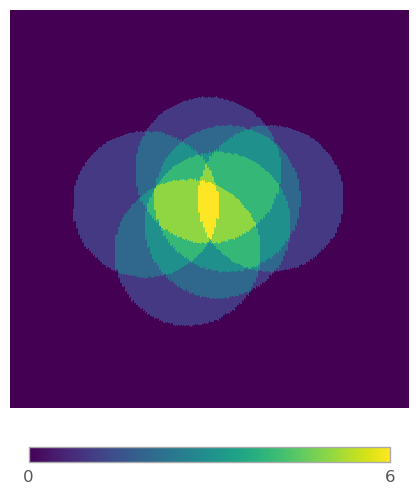

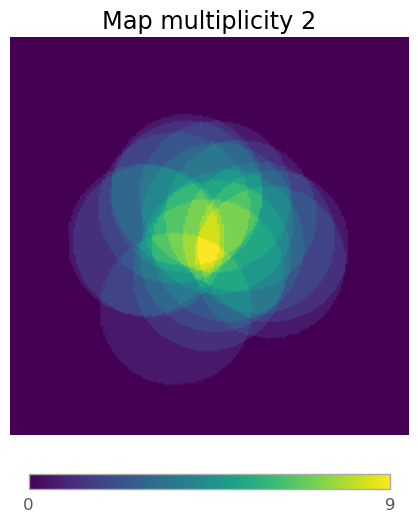

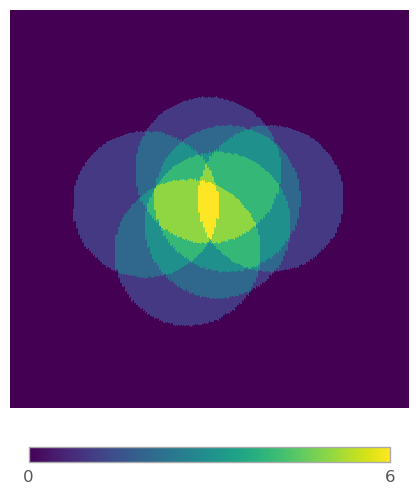

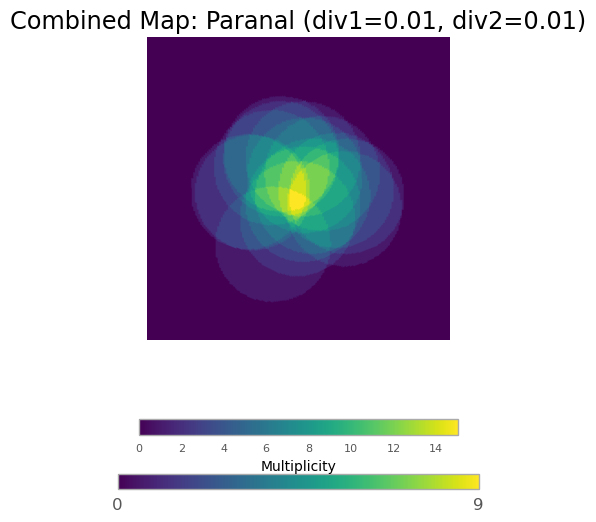

In [53]:
array_division_1.divergent_pointing_2_div(tel_group_2=array_division_2, div1=0.01, div2=0.01, az=0, alt=70)

array_division_1.multiplicity_plot_2_div(array_division_2)

15it [00:02,  6.99it/s]
15it [00:02,  7.10it/s]


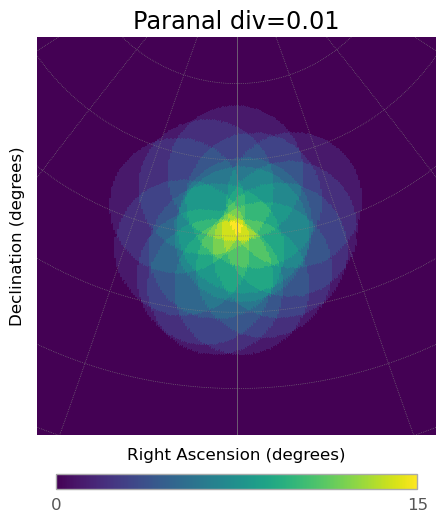

6it [00:00,  7.30it/s]
6it [00:00,  6.79it/s]


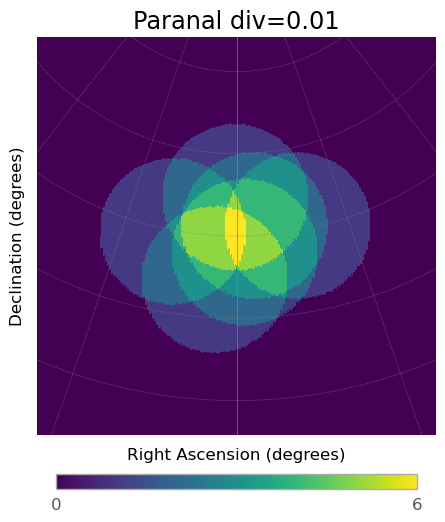

9it [00:01,  7.11it/s]
9it [00:01,  6.89it/s]


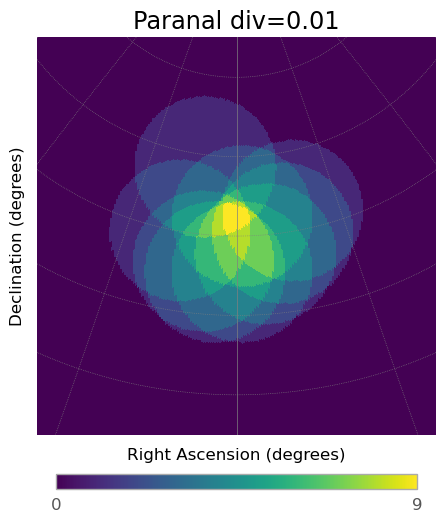

2it [00:00,  6.93it/s]

[1. 1. 1. ... 1. 1. 1.]
[2. 2. 2. ... 1. 1. 1.]


4it [00:00,  7.25it/s]

[1. 1. 1. ... 3. 3. 3.]
[1. 2. 2. ... 3. 3. 3.]


6it [00:00,  7.15it/s]


[2. 2. 2. ... 3. 3. 3.]
[3. 4. 4. ... 2. 2. 2.]


9it [00:01,  7.01it/s]
6it [00:00,  6.48it/s]


12.11372539788755


9it [00:01,  6.95it/s]


 fov  
 deg2 
------
62.462
62.462
62.462
62.462
62.462
62.462
 fov  
 deg2 
------
62.462
62.462
62.462
62.462
62.462
62.462
62.462
62.462
62.462


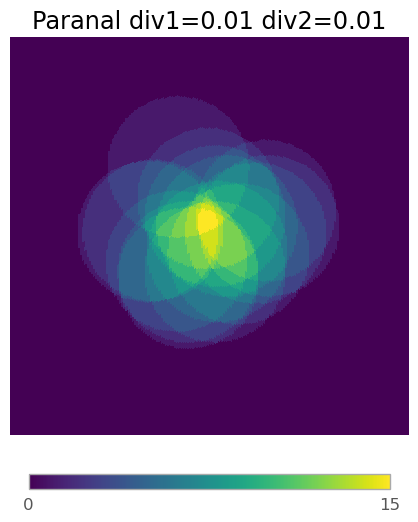

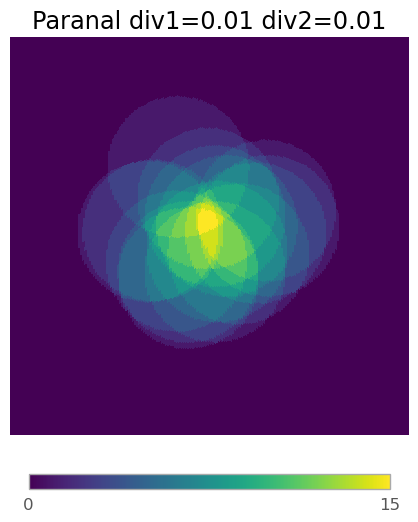

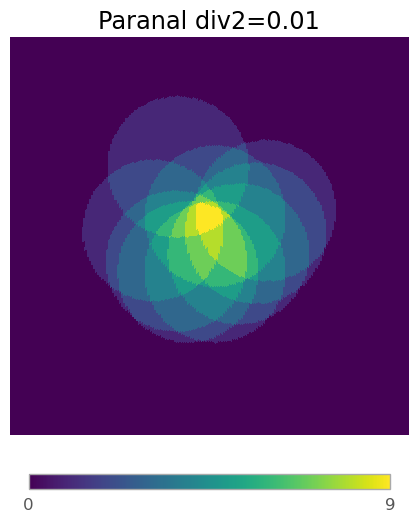

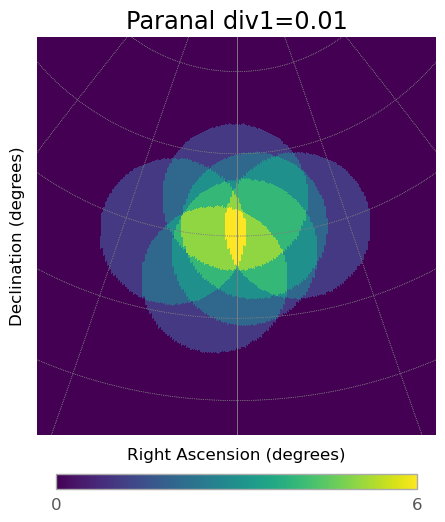

In [46]:
array_SST.divergent_pointing(div=0.01, az=0, alt=70)
array_SST.multiplicity_plot()
array_division_1.divergent_pointing(div=0.01, az=0, alt=70)
array_division_1.multiplicity_plot()
array_division_2.divergent_pointing(div=0.01, az=0, alt=70)
array_division_2.multiplicity_plot()
array_division_1.multiplicity_plot_2_div(array_division_2)

6it [00:00,  7.04it/s]
6it [00:00,  6.90it/s]


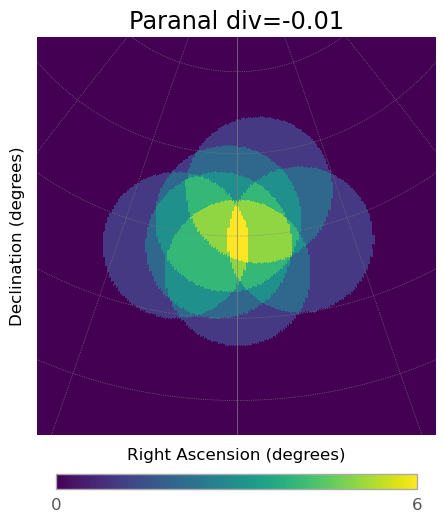

9it [00:01,  7.10it/s]
9it [00:01,  6.97it/s]


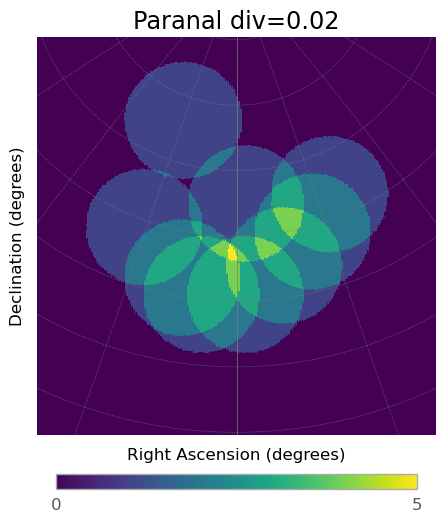

In [41]:
#array_SST.divergent_pointing_2_div(tel_group_1=array_division_1, tel_group_2=array_division_2, div1=-0.01, div2=0.02, az=0, alt=70)
#array_division.multiplicity_plot()
array_division_1.divergent_pointing(div=-0.01, az=0, alt=70)
array_division_1.multiplicity_plot()
array_division_2.divergent_pointing(div=0.02, az=0, alt=70)
array_division_2.multiplicity_plot()

In [52]:
array_SST

15it [00:02,  5.67it/s]
15it [00:02,  5.84it/s]


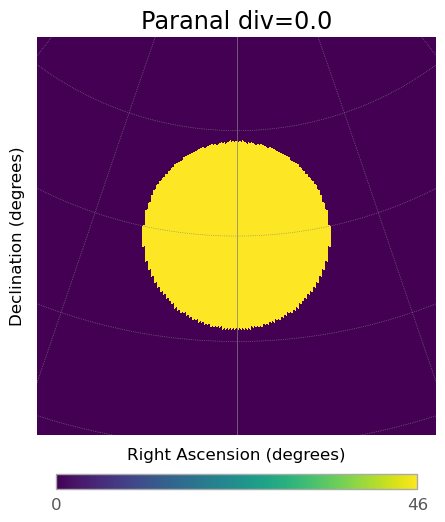

15it [00:02,  5.93it/s]
15it [00:02,  5.78it/s]


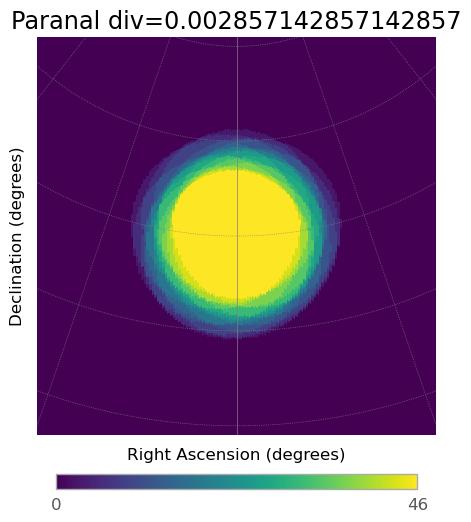

15it [00:02,  6.02it/s]
15it [00:02,  5.81it/s]


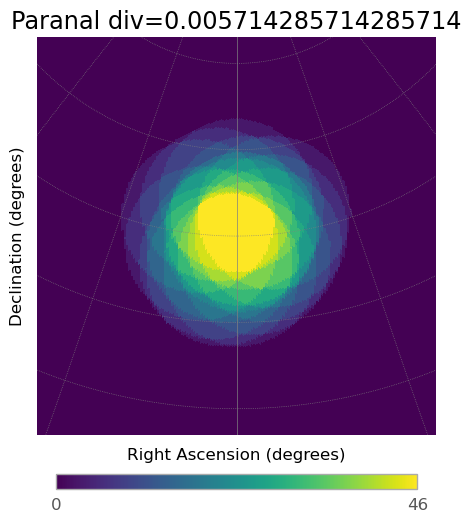

15it [00:02,  6.10it/s]
15it [00:02,  5.81it/s]


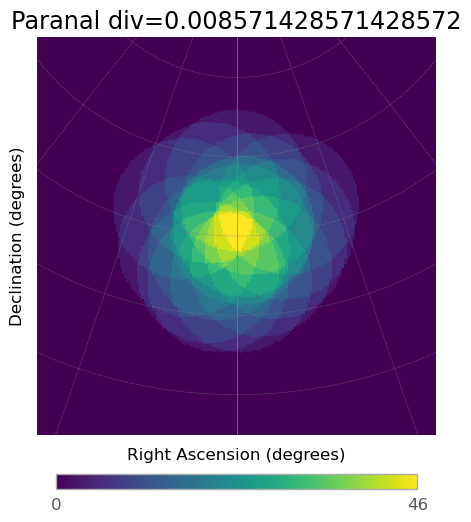

15it [00:02,  6.09it/s]
15it [00:02,  5.84it/s]


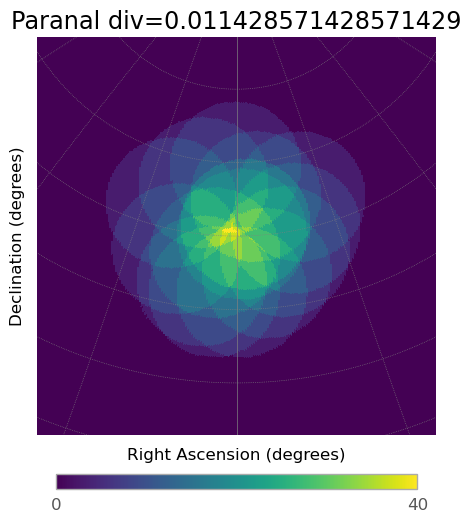

15it [00:02,  6.07it/s]
15it [00:02,  5.95it/s]


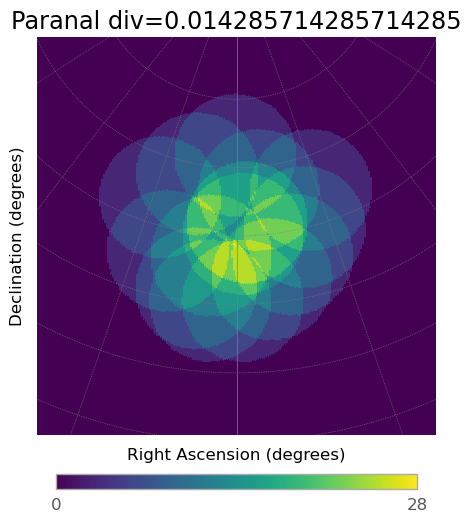

15it [00:02,  6.07it/s]
15it [00:02,  5.94it/s]


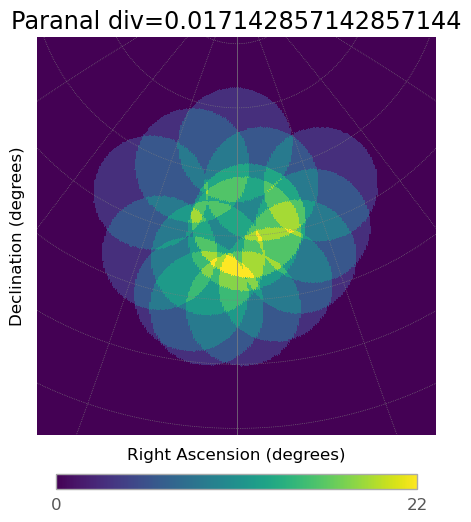

15it [00:02,  6.09it/s]
15it [00:02,  5.93it/s]


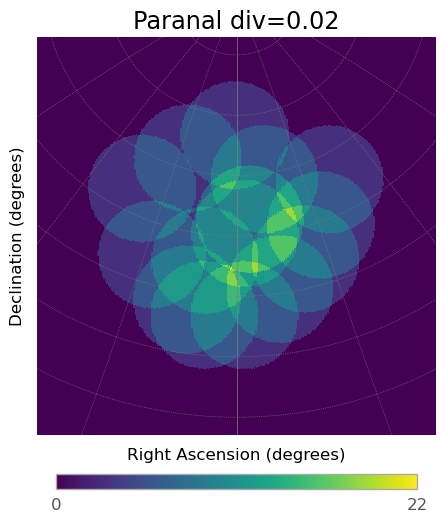

In [53]:
divergence=[]
divergence=np.linspace(0,0.03, 20)
for divergence in div:
    array_SST.divergent_pointing(div=divergence, az=0, alt=70)
    array_SST.multiplicity_plot(number_of_telescopes_subarray_1)
    

15it [00:02,  6.05it/s]
15it [00:02,  5.60it/s]


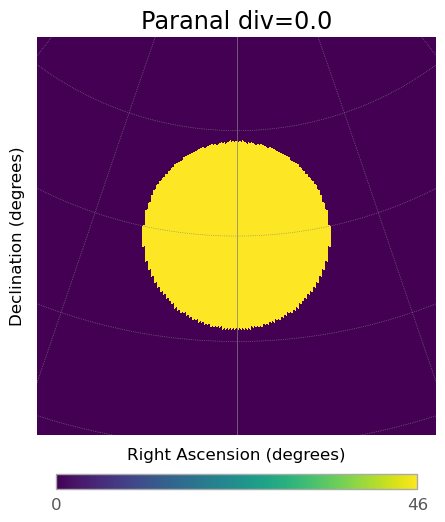

15it [00:02,  6.02it/s]
15it [00:02,  5.87it/s]


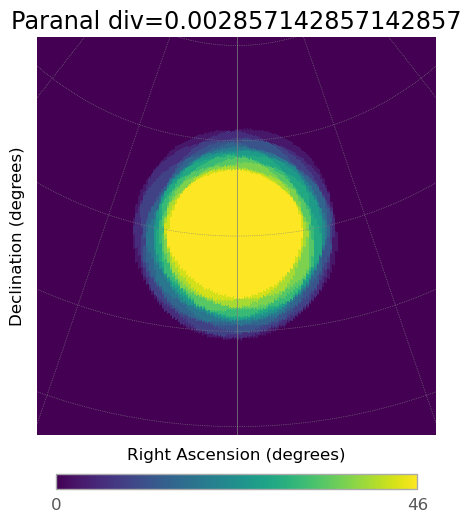

15it [00:02,  5.92it/s]
15it [00:02,  5.88it/s]


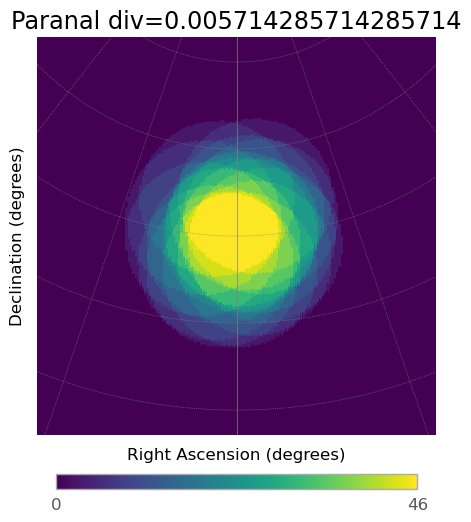

15it [00:02,  5.97it/s]
15it [00:02,  5.81it/s]


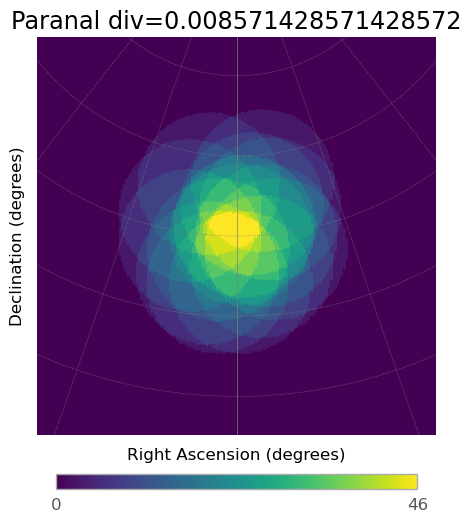

15it [00:02,  5.91it/s]
15it [00:02,  6.91it/s]


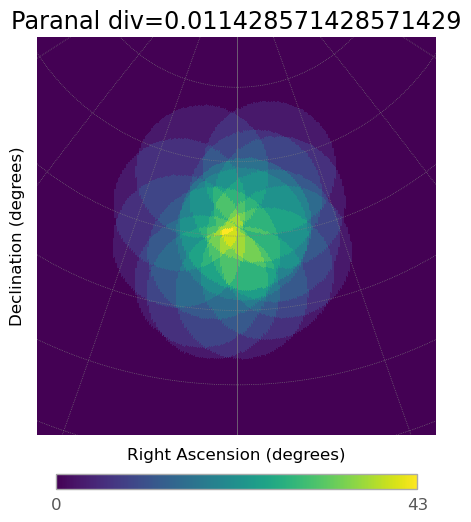

15it [00:02,  7.09it/s]
15it [00:02,  7.02it/s]


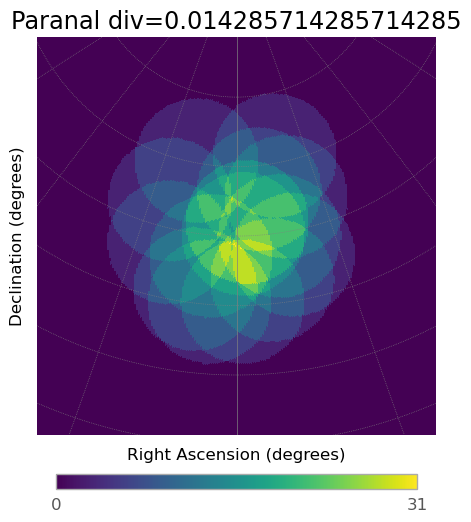

15it [00:02,  7.31it/s]
15it [00:02,  7.02it/s]


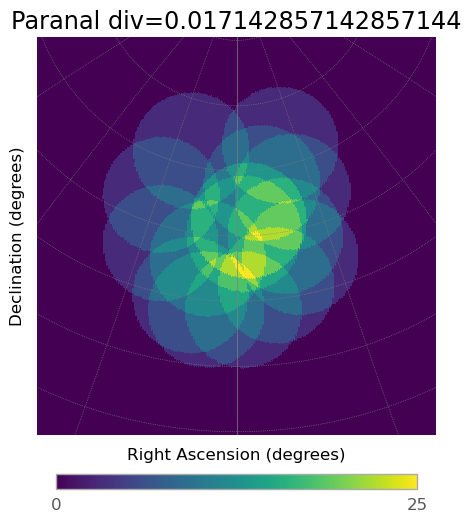

15it [00:02,  7.25it/s]
15it [00:02,  7.11it/s]


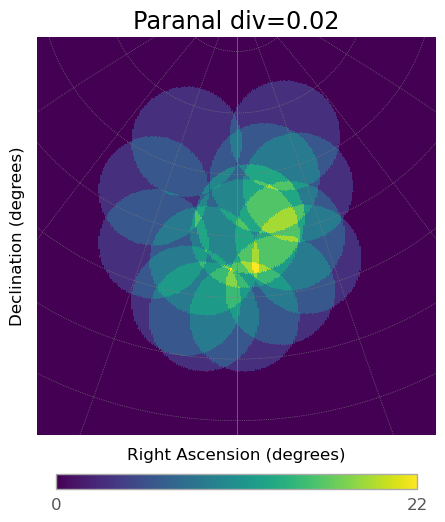

In [54]:
divergence=[]
divergence=np.linspace(0,0.03, 20)
for divergence in div:
    array_SST_2.divergent_pointing(div=divergence, az=0, alt=70)
    array_SST_2.multiplicity_plot(number_of_telescopes_subarray_2)
    

## Full Array

46it [00:06,  7.25it/s]
46it [00:06,  7.08it/s]


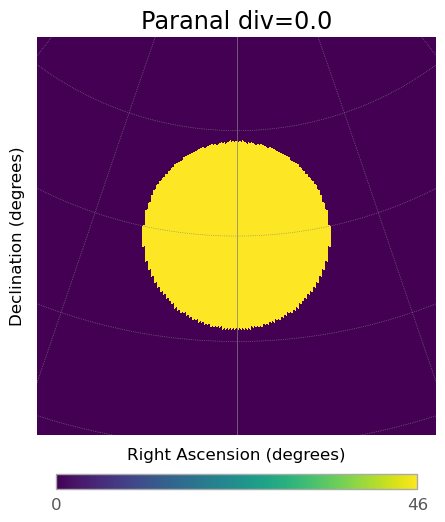

46it [00:06,  7.09it/s]
46it [00:06,  7.13it/s]


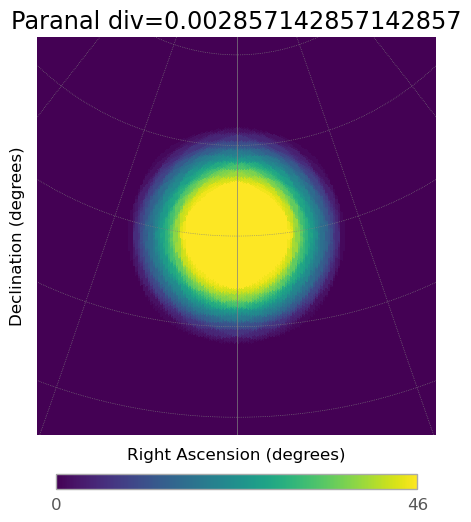

46it [00:06,  7.17it/s]
46it [00:06,  7.12it/s]


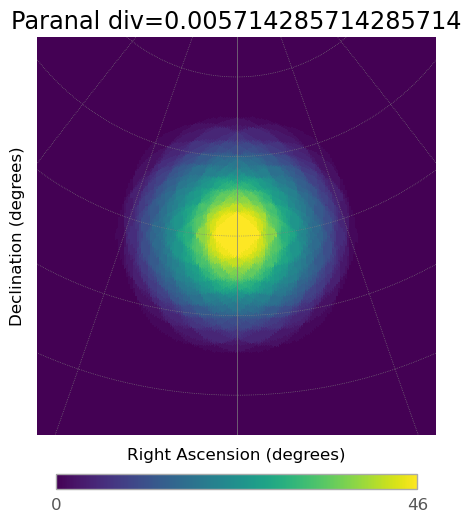

46it [00:06,  7.13it/s]
46it [00:06,  7.11it/s]


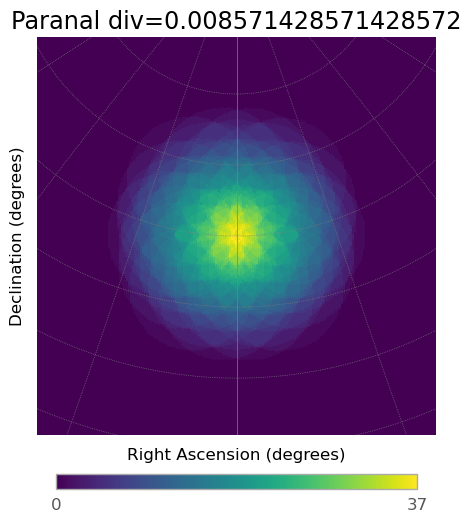

46it [00:06,  7.10it/s]
46it [00:06,  7.12it/s]


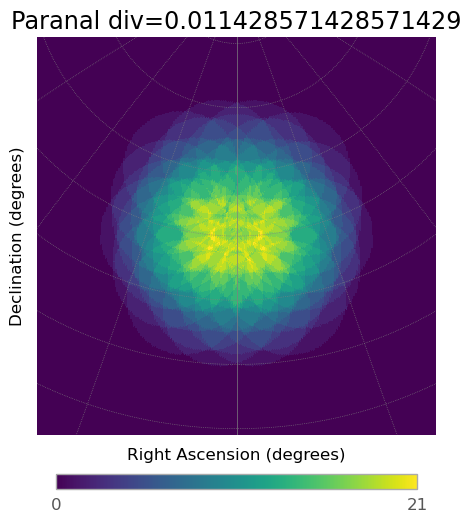

46it [00:06,  7.17it/s]
46it [00:06,  7.15it/s]


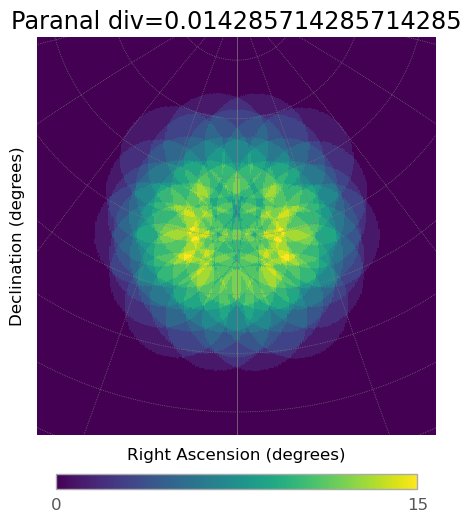

46it [00:06,  7.19it/s]
46it [00:06,  7.06it/s]


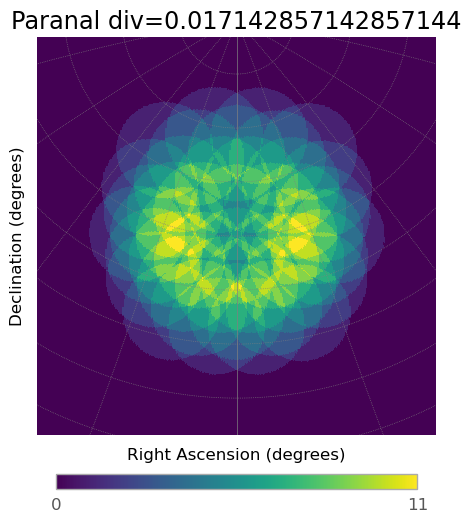

46it [00:06,  7.13it/s]
46it [00:06,  7.14it/s]


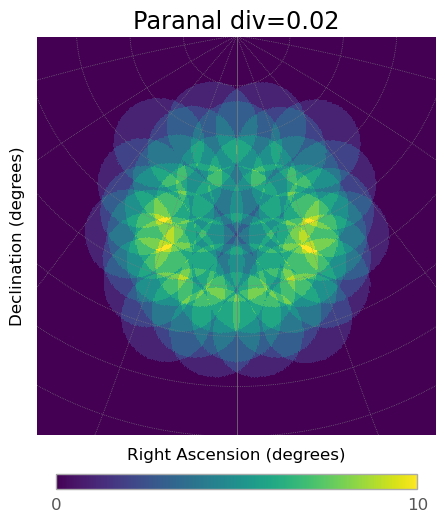

In [55]:
divergence=[]
divergence=np.linspace(0,0.03, 10)
for divergence in div:
    full_array_SST.divergent_pointing(div=divergence, az=0, alt=70)
    full_array_SST.multiplicity_plot()
    

{'barycenter': <mpl_toolkits.mplot3d.art3d.Line3DCollection object at 0x128690a70>, 'SST': <mpl_toolkits.mplot3d.art3d.Path3DCollection object at 0x128495ac0>}


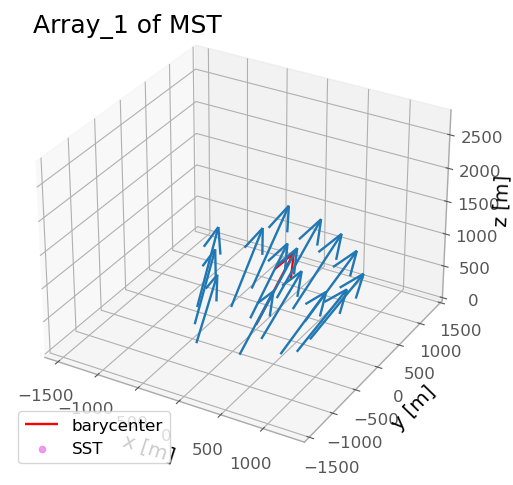

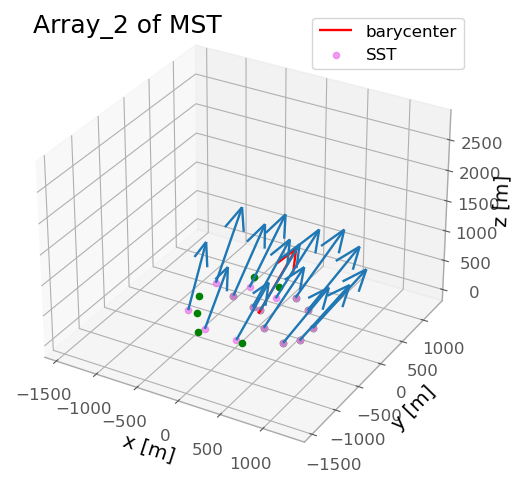

In [56]:
#array_alt_1.display("xyz")
#fig = plt.figure()
ax = array_SST.display("xyz")
#ax = array_division.display("xyz")
ax_2 = array_SST_2.display("xyz")

colors = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_SST.table["fov"]
]
fov_labels = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_2 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_SST.table["fov"]
]
fov_labels_2 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}
colors_3 = [
    'lightseagreen' if np.isclose(fov, 14.5356) else
    'blueviolet' if np.isclose(fov, 46.707) else 
    'green' if np.isclose(fov, 62.462) else
    'red'  # Default color if none of the conditions match
    for fov in array_SST.table["fov"]
]
fov_labels_3 = {
    'lightseagreen': 'LST',
    'blueviolet': 'MST',
    'green': 'SST'
}

#array_3.display("xyz",color=c,label=label)

for i in range(len(array_SST.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_SST.table['x'][i], array_SST.table['y'][i], array_SST.table['z'][i], 
               color=colors[i], label=fov_labels[colors[i]], alpha=1)

for i in range(len(array_SST_2.table)):
    # Color each telescope point according to the FoV
    ax_2.scatter(array_SST_2.table['x'][i], array_SST_2.table['y'][i], array_SST_2.table['z'][i], 
               color='violet', label=fov_labels[colors[i]], alpha=0.8)

# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))

ax.legend(by_label.values(), by_label.keys(), loc='lower left')
ax.text2D(0.05, 0.95, "Array_1 of MST ", 
          transform=ax.transAxes, fontsize=18)


#SECOND Configuration



#for i in range(len(array_SST_2.table)):
    # Color each telescope point according to the FoV
#    ax.scatter(array_SST_2.table['x'][i], array_SST_2.table['y'][i], array_SST_2.table['z'][i], 
#               color=colors_2[i], label=fov_labels_2[colors_2[i]])
   
# Display a legend with unique labels
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
print(by_label)
ax_2.legend(by_label.values(), by_label.keys())
ax_2.text2D(0.05, 0.95, "Array_2 of MST", 
            transform=ax_2.transAxes, fontsize=18)




plt.legend(by_label.values(), by_label.keys())

plt.show()
##SST IN GREEN 
#VIOLET ARE THE MST 
#LIGHT GREEN IS THE LST 